The following date were reported for a gas-phase constant-volume decomposition of dimethyl-ether at 504˚C in a *batch-reactor*. Initially, only (CH$_3$)$_2$O was present.

|Time (s)| 390| 777| 1195| 3155 | infintite |
|:--------|----|----|-----|------|--------|
|Total Pressure (mmHg)| 408 | 488 | 562| 799 | 931|

Why do you thing the total pressure measurement at t = 0 is missing? Can you estimate it?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

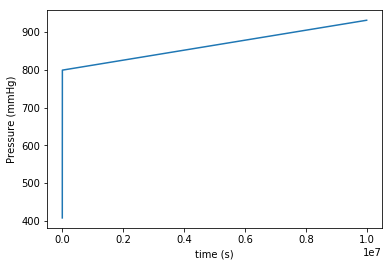

In [2]:
t = np.array([390, 777, 1195, 3155,1e7]) # using 1e7(s) as infinite time
p = np.array([408, 488, 562, 799,931])

plt.plot(t, p) # a plot of t vs p
plt.xlabel("time (s)")
plt.ylabel("Pressure (mmHg)")
plt.show()

In [3]:
P_A = np.poly1d(np.polyfit(t,p,4))
dp_dt = np. poly1d(np.polyder(np.polyfit(t, p, 4)))
r_squared = np.sum((P_A(t) - p) ** 2)

print("r squared for curve fit of pressure:", "{:.3f}".format(r_squared))
print("Preasure at t = 0 is " + "{:.2f}".format(P_A(0)),"mmHg")

r squared for curve fit of pressure: 0.000
Preasure at t = 0 is 314.47 mmHg


I am unsure to why the pressure is left off. The pressure can be estimated at t = 0 to p = 315 mmHg.

Assume that the reaction:
$$ (CH_3)_2O \rightarrow CH_4 + H_2 + CO $$
is irreversable and goes virtually to completion, determine the reaction order and specific reaction *k*. (Ans.: *k* = 0.00048 min$^{-1}$)

Can not solve with the differential method

Solve with nonlinear regression
$$ t = \frac{1}{k} \frac{P_{A0}^{(1-\alpha)}-P_A^{1-\alpha}}{1 - \alpha}$$

To solve with linear regression I am taking this equation and cunstructing a 2d array for the field (k, $\alpha$). I am then going to look for the points where $\alpha$ has the lowest standard deviation among the points and should be able to solve for k when I take the average of $\alpha$ at the lowest standard deviation.

In [57]:
time = np.linspace(t[0],t[-2],100)
alpha = np.linspace(0,10,99)
k = np.array([])
for i in time:
    k = k +  [1 / i * (P_A(t[0]) ** (1 - alpha) - P_A(i) ** (1 - alpha)) / (1 - alpha)]

ValueError: operands could not be broadcast together with shapes (0,) (1,99) 

In [56]:
print(k)





[array([-1.23930220e-01, -6.46128288e-02, -3.36998097e-02, -1.75834442e-02,
       -9.17801629e-03, -4.79250502e-03, -2.50348863e-03, -1.30827278e-03,
       -6.83944546e-04, -3.57695567e-04, -1.87144218e-04, -9.79511365e-05,
       -5.12876383e-05, -2.68649442e-05, -1.40776119e-05, -7.37974818e-06,
       -3.87010933e-06, -2.03036263e-06, -1.06559493e-06, -5.59471846e-07,
       -2.93853729e-07, -1.54401069e-07, -8.11586303e-08, -4.26759828e-08,
       -2.24489387e-08, -1.18132810e-08, -6.21880022e-09, -3.27493646e-09,
       -1.72527427e-09, -9.09224539e-10, -4.79336572e-10, -2.52792992e-10,
       -1.33365386e-10, -7.03839092e-11, -3.71581687e-11, -1.96238551e-11,
       -1.03672096e-11, -5.47879846e-12, -2.89636317e-12, -1.53166316e-12,
       -8.10241267e-13, -4.28750419e-13, -2.26950999e-13, -1.20169763e-13,
       -6.36490718e-14, -3.37225879e-14, -1.78722751e-14, -9.47473511e-15,
       -5.02436009e-15, -2.66513390e-15, -1.41409976e-15, -7.50519453e-16,
       -3.98439961e-16, 